In [253]:
import pandas as pd
import matplotlib.pyplot as plt

# Scrape bballref for the data

In [254]:
url = "https://www.basketball-reference.com/leagues/NBA_2019_per_game.html"
html = pd.read_html(url)
df = html[0] # accessing the table
df


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,...,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,...,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,...,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,...,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


## Clean the data

In [255]:
df[df.Rk == "Rk"].index

Int64Index([ 22,  49,  70,  97, 132, 161, 186, 217, 244, 269, 297, 324, 349,
            382, 411, 438, 468, 498, 527, 554, 579, 604, 642, 671, 694, 715],
           dtype='int64')

In [256]:
# Removing the extra headers from the site for proper data types by dropping the indexes where it's repeated
raw = df.drop(df[df.Rk == 'Rk'].index)
raw

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,...,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,...,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,...,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,...,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [257]:
raw.isnull().sum() # checking for missing values

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        6
3P         0
3PA        0
3P%       47
2P         0
2PA        0
2P%       15
eFG%       6
FT         0
FTA        0
FT%       43
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [258]:
df = raw.fillna(0) # filling any empty values with 0
df  = df.drop(["Rk"], axis=1) # removing this column because it's useless for me
df.to_csv("nba2019.csv", index = False)

nba = pd.read_csv("nba2019.csv")
nba.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

# 🐭 Finding useless data to prove that Lebron is a mickey mouse player #washedking #livelovelaugh

## PPG (excluding playoffs)

In [259]:
nba

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [260]:
maxppg = nba.loc[nba["PTS"].idxmax()]

In [261]:
maxppg = maxppg.to_frame().T

In [262]:
maxppg

# As we can see, Lebron does not have the max PPG #notmyking

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
267,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1


In [263]:
nba.sort_values(by=["PTS"], ascending=False, inplace=True)

# Top 10
top10 = nba.head(10)

<AxesSubplot:xlabel='Player'>

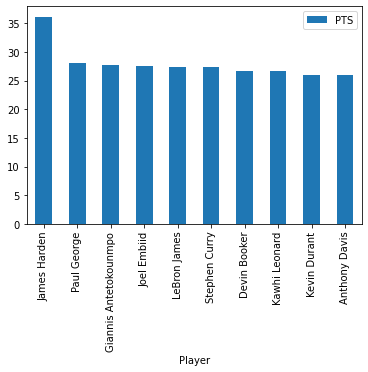

In [264]:
top10.plot(x="Player", y=["PTS"], kind="bar")

## 3P

In [265]:
nba.sort_values(by=["3P"], ascending=False, inplace=True)

# Top 10
top10 = nba.head(10)
top10 

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
159,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,0.472,...,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3
267,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1
313,R.J. Hunter,SG,25,BOS,1,0,26.0,6.0,13.0,0.462,...,0.500,1.0,2.0,3.0,3.0,1.0,0.0,0.0,3.0,17.0
240,Paul George,SF,28,OKC,77,77,36.9,9.2,21.0,0.438,...,0.839,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0
290,Buddy Hield,SG,26,SAC,82,82,31.9,7.6,16.6,0.458,...,0.886,1.3,3.7,5.0,2.5,0.7,0.4,1.8,2.5,20.7
247,Eric Gordon,SG,30,HOU,68,53,31.7,5.6,13.8,0.409,...,0.783,0.3,1.9,2.2,1.9,0.6,0.4,1.3,2.1,16.2
666,Kemba Walker,PG,28,CHO,82,82,34.9,8.9,20.5,0.434,...,0.844,0.6,3.8,4.4,5.9,1.2,0.4,2.6,1.6,25.6
556,J.J. Redick,SG,34,PHI,76,63,31.3,5.9,13.5,0.440,...,0.894,0.3,2.2,2.4,2.7,0.4,0.2,1.3,1.7,18.1
644,Klay Thompson,SG,28,GSW,78,78,34.0,8.4,18.0,0.467,...,0.816,0.5,3.4,3.8,2.4,1.1,0.6,1.5,2.0,21.5
401,Damian Lillard,PG,28,POR,80,80,35.5,8.5,19.2,0.444,...,0.912,0.9,3.8,4.6,6.9,1.1,0.4,2.7,1.9,25.8


In [266]:
# As we can see, Lebron cannot even be found, actually washed. #notmyking
# Let's find out where LeMickeyMouse stands.

lebron = nba["Player"] == "LeBron James"
nba[lebron]["3P"]

332    2.0
Name: 3P, dtype: float64

In [267]:
# Wow only averaging 2 3P made per game? #notmyking
# Finding the number of players that had a higher 3P% than Lebron

players = nba.where(nba["3P"] > nba[lebron]["3P"][332]).dropna(how="all")
players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
159,Stephen Curry,PG,30.0,GSW,69.0,69.0,33.8,9.2,19.4,0.472,...,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3
267,James Harden,PG,29.0,HOU,78.0,78.0,36.8,10.8,24.5,0.442,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1
313,R.J. Hunter,SG,25.0,BOS,1.0,0.0,26.0,6.0,13.0,0.462,...,0.500,1.0,2.0,3.0,3.0,1.0,0.0,0.0,3.0,17.0
240,Paul George,SF,28.0,OKC,77.0,77.0,36.9,9.2,21.0,0.438,...,0.839,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0
290,Buddy Hield,SG,26.0,SAC,82.0,82.0,31.9,7.6,16.6,0.458,...,0.886,1.3,3.7,5.0,2.5,0.7,0.4,1.8,2.5,20.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,Wesley Matthews,SG,32.0,IND,23.0,23.0,31.5,3.5,9.1,0.386,...,0.854,0.5,2.3,2.8,2.4,0.9,0.2,1.3,2.4,10.9
24,Trevor Ariza,SF,33.0,TOT,69.0,69.0,34.0,4.3,10.7,0.399,...,0.793,0.7,4.7,5.4,3.7,1.3,0.3,1.5,1.9,12.5
256,Gerald Green,SG,33.0,HOU,73.0,0.0,20.2,3.2,7.9,0.400,...,0.838,0.4,2.1,2.5,0.5,0.5,0.4,0.8,1.7,9.2
220,Bryn Forbes,SG,25.0,SAS,82.0,81.0,28.0,4.4,9.6,0.456,...,0.885,0.2,2.7,2.9,2.1,0.5,0.0,1.0,1.9,11.8


In [268]:
# As we can see, LeMickeyMouse is worse than 66 players in 3P averages. #notmyking

# Finding out how much help LeMickey needs in the Lakers

In [269]:
lakers = nba.groupby("Tm").get_group("LAL")
lakers

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
332,LeBron James,SF,34,LAL,55,55,35.2,10.1,19.9,0.510,...,0.665,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4
383,Kyle Kuzma,PF,23,LAL,70,68,33.1,7.1,15.5,0.456,...,0.752,0.9,4.6,5.5,2.5,0.6,0.4,1.9,2.4,18.7
93,Reggie Bullock,SG,27,LAL,19,16,27.6,3.3,8.1,0.412,...,0.810,0.1,2.5,2.6,1.1,0.8,0.4,0.6,1.6,9.3
107,Kentavious Caldwell-Pope,SG,25,LAL,82,23,24.8,4.0,9.2,0.430,...,0.867,0.6,2.3,2.9,1.3,0.9,0.2,0.8,1.7,11.4
35,Lonzo Ball,PG,21,LAL,47,45,30.3,3.9,9.7,0.406,...,0.417,1.1,4.2,5.3,5.4,1.5,0.4,2.2,2.4,9.9
281,Josh Hart,SG,23,LAL,67,22,25.6,2.8,6.9,0.407,...,0.688,0.5,3.2,3.7,1.4,1.0,0.6,0.9,2.2,7.8
493,Mike Muscala,PF,27,LAL,17,4,15.6,2.1,4.9,0.434,...,0.875,0.4,2.2,2.6,0.8,0.2,0.6,0.3,1.1,5.9
569,Rajon Rondo,PG,32,LAL,46,29,29.8,3.8,9.4,0.405,...,0.639,0.7,4.5,5.3,8.0,1.2,0.2,2.8,2.2,9.2
625,Lance Stephenson,SG,28,LAL,68,3,16.5,2.7,6.4,0.426,...,0.685,0.5,2.7,3.2,2.1,0.6,0.1,1.3,1.6,7.2
120,Alex Caruso,PG,24,LAL,25,4,21.2,3.1,6.9,0.445,...,0.797,0.8,1.9,2.7,3.1,1.0,0.4,1.7,2.2,9.2


In [270]:
lakerspts = lakers.sort_values(by=["PTS"], ascending=False)
lakerspts

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
332,LeBron James,SF,34,LAL,55,55,35.2,10.1,19.9,0.510,...,0.665,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4
383,Kyle Kuzma,PF,23,LAL,70,68,33.1,7.1,15.5,0.456,...,0.752,0.9,4.6,5.5,2.5,0.6,0.4,1.9,2.4,18.7
320,Brandon Ingram,SF,21,LAL,52,52,33.8,7.0,14.0,0.497,...,0.675,0.8,4.3,5.1,3.0,0.5,0.6,2.5,2.9,18.3
448,JaVale McGee,C,31,LAL,75,62,22.3,5.3,8.5,0.624,...,0.632,2.6,4.9,7.5,0.7,0.6,2.0,1.4,2.8,12.0
107,Kentavious Caldwell-Pope,SG,25,LAL,82,23,24.8,4.0,9.2,0.430,...,0.867,0.6,2.3,2.9,1.3,0.9,0.2,0.8,1.7,11.4
35,Lonzo Ball,PG,21,LAL,47,45,30.3,3.9,9.7,0.406,...,0.417,1.1,4.2,5.3,5.4,1.5,0.4,2.2,2.4,9.9
93,Reggie Bullock,SG,27,LAL,19,16,27.6,3.3,8.1,0.412,...,0.810,0.1,2.5,2.6,1.1,0.8,0.4,0.6,1.6,9.3
569,Rajon Rondo,PG,32,LAL,46,29,29.8,3.8,9.4,0.405,...,0.639,0.7,4.5,5.3,8.0,1.2,0.2,2.8,2.2,9.2
120,Alex Caruso,PG,24,LAL,25,4,21.2,3.1,6.9,0.445,...,0.797,0.8,1.9,2.7,3.1,1.0,0.4,1.7,2.2,9.2
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [271]:
# Finding the next 3 best scorers beside Lebron and how much help he needs
next3lakers = lakerspts[1:4]["PTS"].sum()
next3lakers

49.0

In [272]:
raptors = nba.groupby("Tm").get_group("TOR")
raptors

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
254,Danny Green,SG,31,TOR,80,80,27.7,3.7,7.9,0.465,...,0.841,0.8,3.2,4.0,1.6,0.9,0.7,0.9,2.1,10.3
411,Kyle Lowry,PG,32,TOR,65,65,34.0,4.7,11.4,0.411,...,0.830,0.6,4.2,4.8,8.7,1.4,0.5,2.8,2.6,14.2
397,Kawhi Leonard,SF,27,TOR,60,60,34.0,9.3,18.8,0.496,...,0.854,1.3,6.0,7.3,3.3,1.8,0.4,2.0,1.5,26.6
660,Fred VanVleet,PG,24,TOR,64,28,27.5,3.8,9.4,0.410,...,0.843,0.3,2.3,2.6,4.8,0.9,0.3,1.3,1.7,11.0
549,Norman Powell,SG,25,TOR,60,3,18.8,3.2,6.7,0.483,...,0.827,0.3,2.1,2.3,1.5,0.7,0.2,1.1,1.6,8.6
459,C.J. Miles,SF,31,TOR,40,1,14.1,1.8,5.2,0.340,...,0.795,0.3,1.4,1.7,0.6,0.5,0.3,0.5,1.6,5.5
597,Pascal Siakam,PF,24,TOR,80,79,31.9,6.5,11.8,0.549,...,0.785,1.6,5.3,6.9,3.1,0.9,0.7,1.9,3.0,16.9
462,Malcolm Miller,SF,25,TOR,10,0,6.7,1.1,2.6,0.423,...,0.750,0.1,0.4,0.5,0.1,0.1,0.1,0.1,0.5,3.5
453,Jodie Meeks,SG,31,TOR,8,0,13.0,2.6,4.9,0.538,...,1.000,0.1,1.4,1.5,1.0,0.1,0.1,0.3,0.6,6.4
22,OG Anunoby,SF,21,TOR,67,6,20.2,2.7,6.0,0.453,...,0.581,0.9,2.1,2.9,0.7,0.7,0.3,0.8,2.1,7.0


In [273]:
raptorspts = raptors.sort_values(by=["PTS"], ascending=False)
next3raps = raptorspts[1:4]["PTS"].sum()
next3raps


46.099999999999994

In [274]:
next3lakers > next3raps

True

In [275]:
# Based on this super important data, we can tell that Lebron required more help to get the buckets as compared to the TRUE CHAMPIONS #wethenorthbtw 